In [1]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the zip file
zip_file_path = r"C:\\Users\\akmusinguzi\\Downloads\\Netflix Data.zip"

# Desired output file name
output_file = "Netflix_shows_movies.csv"

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the first file in the zip
    extracted_file = zip_ref.namelist()[0]
    zip_ref.extract(extracted_file)

    # Rename the extracted file to the desired name
    os.rename(extracted_file, output_file)
    print(f"File successfully extracted and saved as '{output_file}'")

File successfully extracted and saved as 'Netflix_shows_movies.csv'


In [2]:
# Load the dataset
df = pd.read_csv('Netflix_shows_movies.csv')

# Check for missing values
missing_values = df.isnull().sum()

# Fill missing values with "Unknown'
df_filled = df.fillna('Unknown')

# View first few rows
print("\nFirst few rows of the filled dataset:")
print(df_filled.head())

# View summary statistics
print(df_filled.describe())

# View data types and missing values
print(df_filled.info())

# Numerical column analysis
print(df['duration'].describe())

# Categorical column analysis
print(df['type'].value_counts())
print(df['country'].value_counts())


First few rows of the filled dataset:
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                   Unknown   
2                   Unknown   
3                   Unknown   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country   

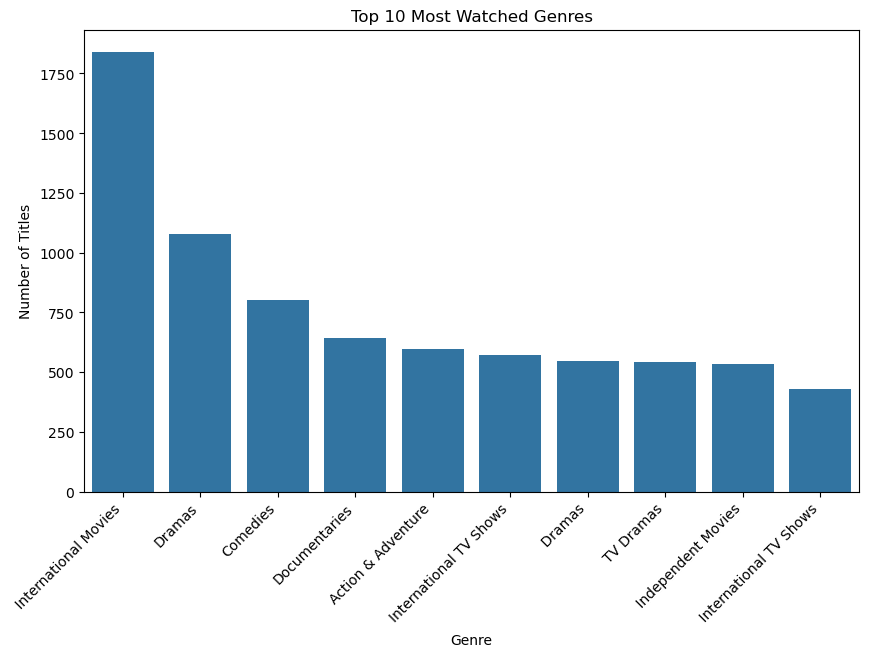

In [3]:
# Load the data 
df = pd.read_csv('Netflix_shows_movies.csv')

# 1. Most Watched Genres

# Split the 'listed_in' column into a list of genres
df['genres'] = df['listed_in'].str.split(',')

# Explode the dataframe to have one row per genre
genre_df = df.explode('genres')

# Count occurrences of each genre
genre_counts = genre_df['genres'].value_counts()

# Plot the top 10 genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10])
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.title('Top 10 Most Watched Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

In [4]:
# 2. Ratings Distribution

# Plot the histogram for 'rating'
plt.figure(figsize=(8, 6))
plt.hist(df['rating'].dropna(), bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ratings Distribution')

# Adjust x-axis ticks
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()